In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### EXPLORATORY DATA ANALYSIS
### -------------------------
# Load the dataset
dataset1 = '/Users/riyatrikha/Downloads/listings.csv'
df_airbnb = pd.read_csv(dataset1)
print(df_airbnb.dtypes)

# Check total of missing values in columns
missing_data = df_airbnb.isnull().sum() / len(df_airbnb) * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

print("Percentage of missing data per column:")
print(missing_data)


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Data Preprocessing
# Select relevant columns based on features we are interested in
la_airbnb1 = df_airbnb[['bathrooms', 'bedrooms', 'price', 'accommodates']].copy()

# Remove rows with missing or invalid values
la_airbnb1.dropna(subset=['bathrooms', 'bedrooms', 'price'], inplace=True)

# Convert price to numeric values
la_airbnb1['price'] = la_airbnb1['price'].replace('[\$,]', '', regex=True).astype(float)



<>:33: SyntaxWarning: invalid escape sequence '\$'
<>:33: SyntaxWarning: invalid escape sequence '\$'
/var/folders/44/6cm6l7kx12j_k88drz0yx64w0000gn/T/ipykernel_63463/1381474418.py:33: SyntaxWarning: invalid escape sequence '\$'
  la_airbnb1['price'] = la_airbnb1['price'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/44/6cm6l7kx12j_k88drz0yx64w0000gn/T/ipykernel_63463/1381474418.py:10: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_airbnb = pd.read_csv(dataset1)


id                                int64
name                             object
host_id                           int64
host_name                        object
host_since                       object
host_response_time               object
host_response_rate              float64
host_is_superhost                object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
beds                            float64
price                           float64
minimum_nights                    int64
availability_365                  int64
number_of_reviews                 int64
review_scores_rating            float64
license                          object
instant_bookable                 object


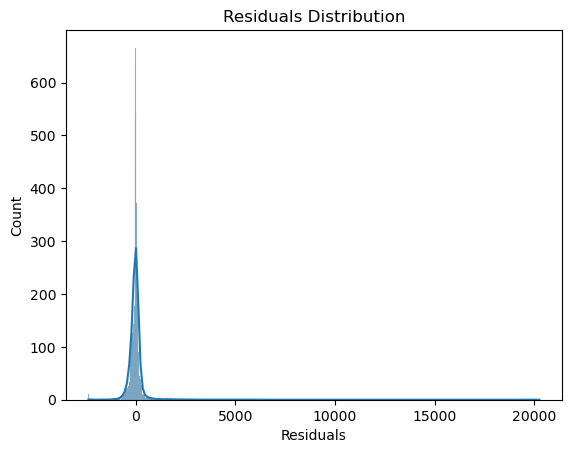

Skewed Model Performance:
 Skewed R²: 0.27
 Skewed RMSE: 636.27
Coefficients: [231.85935589  -7.85019856  22.99019579]
Intercept: -176.34654722959033
Mean Squared Error: 404842.4451750443
R^2 Score: 0.2733364281422792
Log-Transformed Model Performance:
Log R²: 0.49
Log RMSE: 0.62


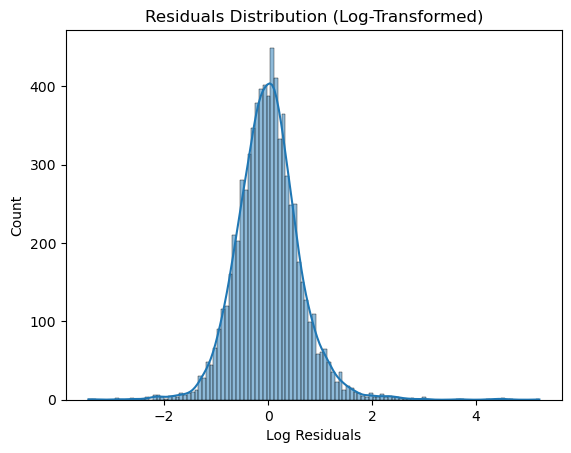

In [7]:
# Features Matrix and Target Variable
X = la_airbnb1[['bathrooms', 'bedrooms', 'accommodates']]
y = la_airbnb1['price']

# Split the airbnb data into training and testing sets
# Where X is bathrooms, bedrooms, accomodates
# Y is price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform Regression
# Initialize and use the model
price_model_1 = LinearRegression()
price_model_1.fit(X_train, y_train)
y_pred = price_model_1.predict(X_test)

# Find r2 and rmse
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Residuals
# Plot residuals for Skewed Initial model
residuals = y_test - y_pred
sns.histplot(residuals, kde = True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

print("Skewed Model Performance:")
print(f" Skewed R²: {r2:.2f}")
print(f" Skewed RMSE: {rmse:.2f}")

print("Coefficients:", price_model_1.coef_)
print("Intercept:", price_model_1.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Log-transform the price to fix skewness
la_airbnb1['log_price'] = np.log1p(la_airbnb1['price'])  # Use log1p to handle zeros safely

# Log-transform predictor variable
y_log = la_airbnb1['log_price']

# Split the new transformed data and initialize the model
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)
price_log_model = LinearRegression()
price_log_model.fit(X_train_log, y_train_log)
y_pred_log = price_log_model.predict(X_test_log)
r2_log = r2_score(y_test_log, y_pred_log)
rmse_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))

print("Log-Transformed Model Performance:")
print(f"Log R²: {r2_log:.2f}")
print(f"Log RMSE: {rmse_log:.2f}")

# Plot residuals of Log-Transformed model
residuals_log = y_test_log - y_pred_log
sns.histplot(residuals_log, kde=True)
plt.title('Residuals Distribution (Log-Transformed)')
plt.xlabel('Log Residuals')
plt.show()


In [9]:

## VIF
# Import necessary libraries for VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF Calculation for selected features
x_vif = la_airbnb1[['accommodates', 'bathrooms', 'bedrooms', 'price']]
x_vif = sm.add_constant(x_vif)

# Calculate the VIF
airbnb_vif_data = pd.DataFrame()
airbnb_vif_data['Variable'] = x_vif.columns
airbnb_vif_data['VIF'] = [variance_inflation_factor(x_vif.values, i) for i in range(x_vif.shape[1])]

print("\nVariance Inflation Factors (VIF):")
print(airbnb_vif_data)



Variance Inflation Factors (VIF):
       Variable       VIF
0         const  3.441153
1  accommodates  3.059992
2     bathrooms  2.676654
3      bedrooms  4.188388
4         price  1.280737


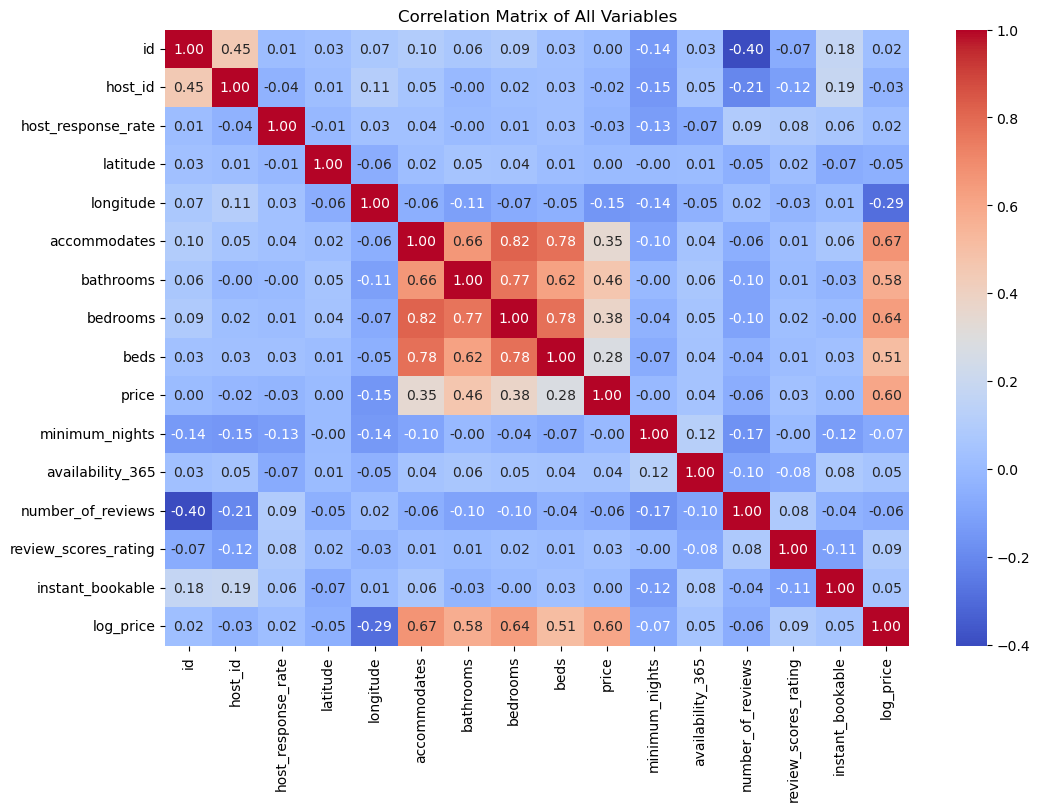

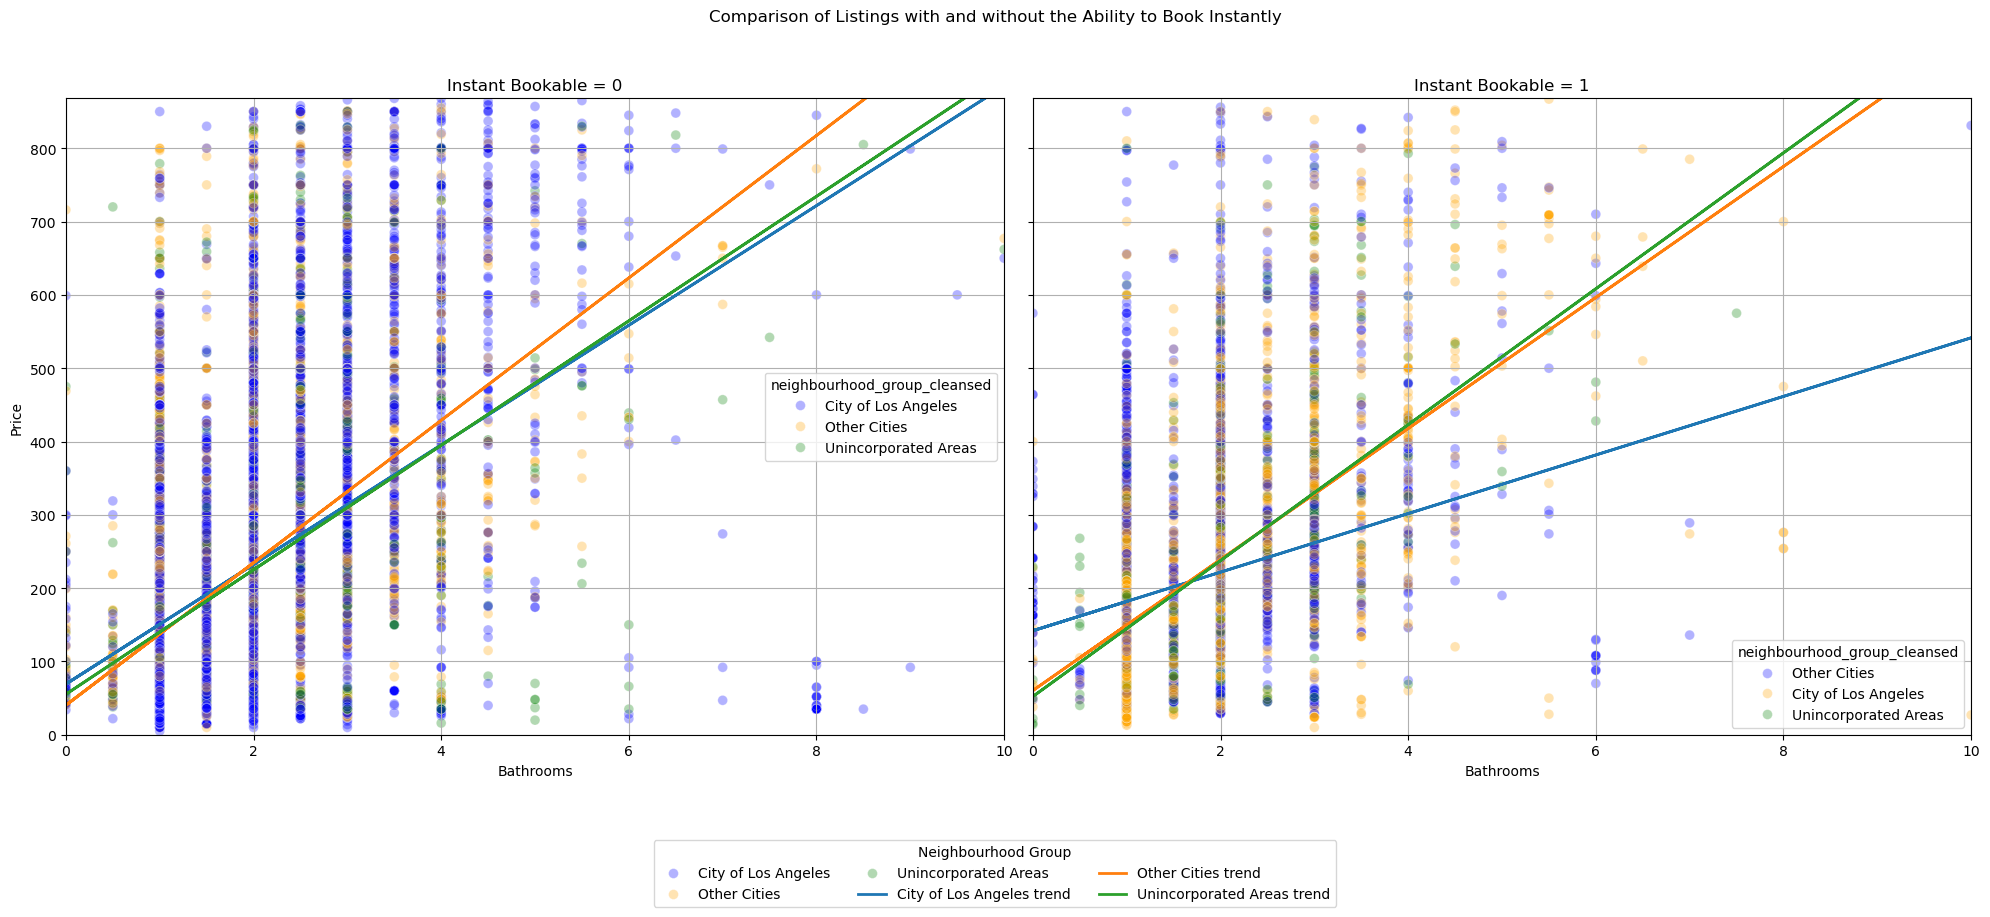

In [11]:
### CORRELATION ANALYSIS
# Log-transform the price to fix skewness 
df_airbnb['log_price'] = np.log1p(df_airbnb['price'])
df_airbnb = df_airbnb.dropna(subset=['log_price'])

# Filter necessary features
df_airbnb['instant_bookable'] = df_airbnb['instant_bookable'].map({'f': 0, 't': 1})
filtered_data = df_airbnb.dropna(subset=['bathrooms', 'price', 'neighbourhood_group_cleansed'])

# Select only numerical columns and find and plot the correlation matrix
numerical_data = filtered_data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of All Variables")
plt.show()


# Setup figure and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
instant_bookable_groups = [0, 1]

# Price limits based on quantiles
price_upper_limit = filtered_data['price'].quantile(0.95)

for i, instant in enumerate(instant_bookable_groups):
    subset = filtered_data[(filtered_data['instant_bookable'] == instant) &
                           (filtered_data['price'] <= price_upper_limit)]

    # Scatter plot of the bathrooms v price
    sns.scatterplot(ax=axes[i], x="bathrooms", y="price",
                    hue="neighbourhood_group_cleansed", data=subset,
                    palette=['blue', 'orange', 'green'], s=50, alpha=0.3)

    # Plot a regression line for each neighborhood group from dataset
    k = subset['neighbourhood_group_cleansed'].unique()
    for k in k:
        k_data = subset[subset['neighbourhood_group_cleansed'] == k]
        if not k_data.empty:
            m, b = np.polyfit(k_data['bathrooms'], k_data['price'], 1)
            axes[i].plot(k_data['bathrooms'], m*k_data['bathrooms'] + b,
                         label=f'{k} trend', linewidth=2)
    axes[i].set_title(f"Instant Bookable = {instant}")
    axes[i].set_xlabel("Bathrooms")
    axes[i].set_xlim(0, 10)
    if i == 0:
        axes[i].set_ylabel("Price")
    axes[i].set_ylim(0, price_upper_limit)
    axes[i].grid(True)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), title="Neighbourhood Group", ncol=3)
fig.suptitle("Comparison of Listings with and without the Ability to Book Instantly")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [13]:
# To show Beds and Accomodates are conceptually and
# statistically related
# Calculate correlation
correlation1 = df_airbnb[['bedrooms', 'accommodates']].corr()
print(correlation1)

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Model 1: Log_Price ~ Accommodates
model_1 = ols('log_price ~ accommodates', data=df_airbnb).fit()

# Model 2: Log_Price ~ Accommodates + Bedrooms
model_2 = ols('log_price ~ accommodates + bedrooms', data=df_airbnb).fit()

# Compare the models using Adjusted R^2
print("Model with Accomodates Adjusted R²:", model_1.rsquared_adj)
print("Model with Accomodates and Bedrooms Adjusted R²:", model_2.rsquared_adj)


              bedrooms  accommodates
bedrooms      1.000000      0.818402
accommodates  0.818402      1.000000
Model with Accomodates Adjusted R²: 0.44477820649479916
Model with Accomodates and Bedrooms Adjusted R²: 0.4702973312192509


Index(['bathrooms', 'bedrooms', 'price', 'accommodates', 'log_price',
       'neighbourhood_group', 'id'],
      dtype='object')
['City of Los Angeles' 'Other Cities' 'Unincorporated Areas']
Index(['neighbourhood_group', 'neighbourhood'], dtype='object')
Index(['bathrooms', 'bedrooms', 'price', 'accommodates', 'log_price',
       'neighbourhood_group', 'id', 'neighbourhood_cleansed'],
      dtype='object')
['West Los Angeles' 'Beverly Hills' 'Temple City' 'Santa Monica'
 'North Hollywood' 'Del Rey' 'Venice' 'Beverly Grove' 'Westlake'
 'Downtown' 'West Hollywood' 'Fairfax' 'Culver City' 'Toluca Lake'
 'Long Beach' 'Hollywood' 'Koreatown' 'Westwood' 'Mid-Wilshire' 'Torrance'
 'Hollywood Hills West' 'Century City' 'Mid-City' 'Sherman Oaks'
 'Rancho Park' 'Hermosa Beach' 'El Sereno' 'Pico Rivera' 'Pico-Robertson'
 'Echo Park' 'Encino' 'Exposition Park' 'Gardena' 'Compton' 'Hancock Park'
 'Alhambra' 'Signal Hill' 'Brentwood' 'Santa Clarita' 'South San Gabriel'
 'Silver Lake' 'Monrovia' 'Mar

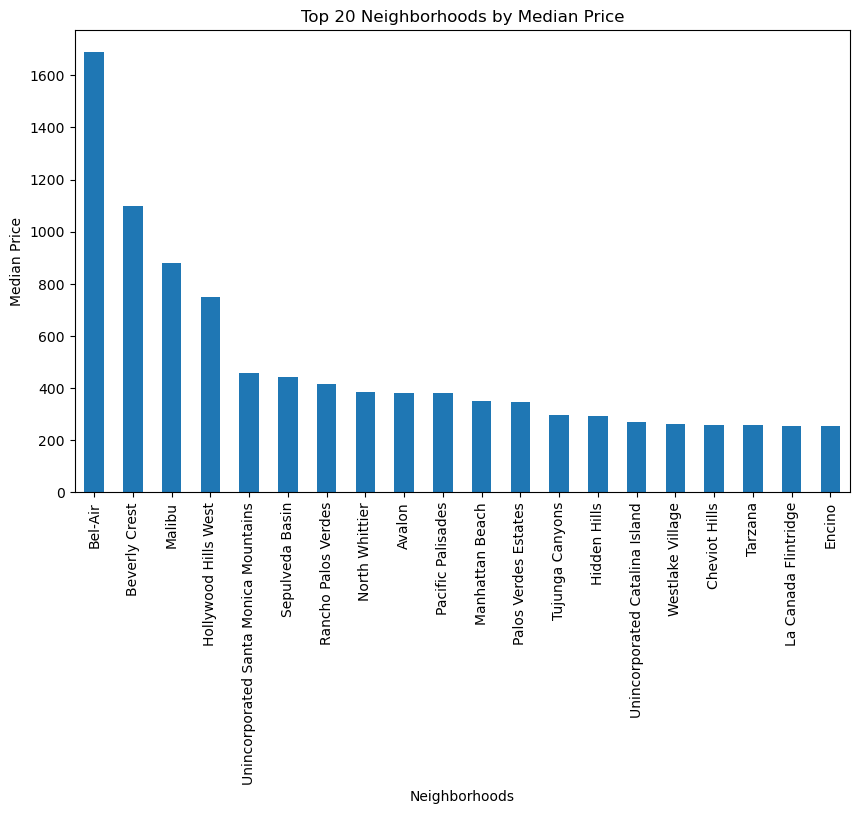

Neighborhood: West Los Angeles, R²: 0.48
Neighborhood: Beverly Hills, R²: 0.59
Neighborhood: Temple City, R²: 0.82
Neighborhood: Santa Monica, R²: 0.22
Neighborhood: North Hollywood, R²: 0.58
Neighborhood: Del Rey, R²: 0.46
Neighborhood: Venice, R²: 0.52
Neighborhood: Beverly Grove, R²: 0.72
Neighborhood: Westlake, R²: 0.23
Neighborhood: Downtown, R²: 0.32
Neighborhood: West Hollywood, R²: 0.30
Neighborhood: Fairfax, R²: 0.63
Neighborhood: Culver City, R²: 0.33
Neighborhood: Toluca Lake, R²: 0.44
Neighborhood: Long Beach, R²: 0.53
Neighborhood: Hollywood, R²: 0.41
Neighborhood: Koreatown, R²: 0.46
Neighborhood: Westwood, R²: 0.47
Neighborhood: Mid-Wilshire, R²: 0.68
Neighborhood: Torrance, R²: 0.75
Neighborhood: Hollywood Hills West, R²: 0.68
Neighborhood: Century City, R²: 0.80
Neighborhood: Mid-City, R²: 0.46
Neighborhood: Sherman Oaks, R²: 0.77
Neighborhood: Rancho Park, R²: 0.30
Neighborhood: Hermosa Beach, R²: 0.42
Neighborhood: El Sereno, R²: 0.27
Neighborhood: Pico Rivera, R²: 0

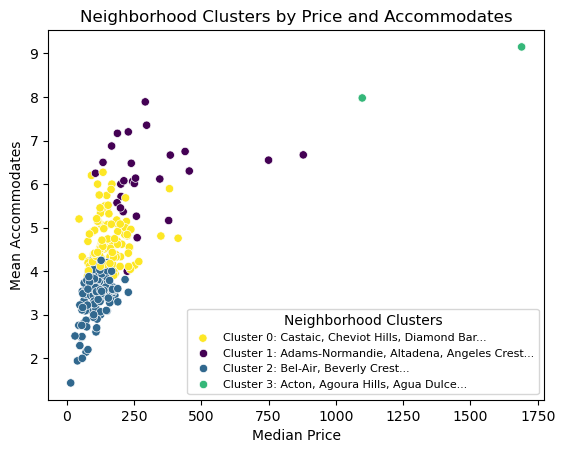

In [15]:
### CLUSTER ANALYSIS
# Restore the 'neighbourhood' and 'id' column
# Add neighbourhood_group_cleansed and id column
la_airbnb1['neighbourhood_group'] = df_airbnb['neighbourhood_group_cleansed']
la_airbnb1['id'] = df_airbnb['id']

print(la_airbnb1.columns)
print(la_airbnb1['neighbourhood_group'].unique())


# Load the second dataset, neighborhoods.csv data
neighborhoods = pd.read_csv('/Users/riyatrikha/Downloads/neighbourhoods.csv')
print(neighborhoods.columns)

# Merge the two datasets, la_airbnb1 and neighborhoods.csv
df_merged = pd.merge(la_airbnb1, df_airbnb[['id', 'neighbourhood_cleansed']], on='id', how='left')
print(df_merged.columns)
print(df_merged['neighbourhood_cleansed'].unique())

# Sort price statistics by neighborhood
neighborhood_summary = df_merged.groupby('neighbourhood_cleansed')['price'].median().sort_values(ascending=False)

# Plot the top 20 neighborhoods by median price
top_neighborhoods = neighborhood_summary.head(20)
top_neighborhoods.plot(kind='bar', figsize=(10, 6))
plt.title('Top 20 Neighborhoods by Median Price')
plt.ylabel('Median Price')
plt.xlabel('Neighborhoods')
plt.xticks()
plt.show()

# Apply the new model for each neighborhood to get top neighborhoods in price
r2_scores = {}
for group in df_merged['neighbourhood_cleansed'].unique():
    subgroup = df_merged[df_merged['neighbourhood_cleansed'] == group]
    if len(subgroup) > 30:
        X_sub = subgroup[['bathrooms', 'bedrooms', 'accommodates']]
        y_sub = subgroup['log_price']

        X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(
            X_sub, y_sub, test_size=0.2, random_state=42
        )

        price_log_model.fit(X_train_sub, y_train_sub)
        y_pred_sub = price_log_model.predict(X_test_sub)
        r2_sub = r2_score(y_test_sub, y_pred_sub)
        r2_scores[group] = r2_sub


        print(f"Neighborhood: {group}, R²: {r2_sub:.2f}")

max_neighborhood = max(r2_scores, key=r2_scores.get)
min_neighborhood = min(r2_scores, key=r2_scores.get)

print(f"Highest R² Score: {max_neighborhood} with R²= {r2_scores[max_neighborhood]:.2f}")
print(f"Lowest R² Score: {min_neighborhood} with R²= {r2_scores[min_neighborhood]:.2f}")
coefficients = []

for group in df_merged['neighbourhood_cleansed'].unique():
    subgroup = df_merged[df_merged['neighbourhood_cleansed'] == group]
    if len(subgroup) > 30:
        X_sub = subgroup[['bathrooms', 'bedrooms', 'accommodates']]
        y_sub = subgroup['log_price']

        price_log_model.fit(X_sub, y_sub)
        coefficients.append({
            'Neighborhood': group,
            'Bathrooms Coeff': price_log_model.coef_[0],
            'Bedrooms Coeff': price_log_model.coef_[1],
            'Accommodates Coeff': price_log_model.coef_[2]
        })

coefficients_df = pd.DataFrame(coefficients)
print(coefficients_df)

# Aggregate neighborhood features
neighborhood_features = df_merged.groupby('neighbourhood_cleansed').agg({
    'price': 'median',
    'accommodates': 'mean',
    'bathrooms': 'mean',
    'bedrooms': 'mean'
}).reset_index()

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(neighborhood_features.drop('neighbourhood_cleansed', axis=1))

# Perform K-means clustering based on the features 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
neighborhood_features['cluster'] = kmeans.fit_predict(features_scaled)

# Map neighborhoods to the 4 clusters
cluster_to_neighborhoods = neighborhood_features.groupby('cluster')['neighbourhood_cleansed'].apply(list)

# Create the neighborhoods legend
custom_legend = []
for cluster, neighborhoods in cluster_to_neighborhoods.items():
    cluster_name = f"Cluster {cluster}: {', '.join(neighborhoods[:3])}..."  # Display top 3 neighborhoods
    custom_legend.append(cluster_name)

# Plot the cluster scatterplot
sns.scatterplot(
    data=neighborhood_features,
    x='price',
    y='accommodates',
    hue = 'cluster',
    palette='viridis')
plt.legend(
    title="Neighborhood Clusters",
    labels=custom_legend,
    loc='best',
    fontsize=8,
    title_fontsize=10
)
plt.title('Neighborhood Clusters by Price and Accommodates')
plt.xlabel('Median Price')
plt.ylabel('Mean Accommodates')
plt.show()
